<a href="https://colab.research.google.com/github/CarlosVerse/Data-Science/blob/main/analisando_os_dados_do_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-12-29/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,21143,3,33,2022-12-19,0.26,1,309,6,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,5728,7,102,2022-12-05,0.80,4,305,11,NaN
2,317484,Single Room in Palermo Soho,1621752,Luba,NaN,Palermo,-34.58992,-58.42236,Private room,3348,2,160,2022-12-10,1.22,4,349,5,NaN
3,15074,ROOM WITH RIVER SIGHT,59338,Monica,NaN,Nuñez,-34.53892,-58.46599,Private room,5286,29,0,NaN,NaN,1,365,0,NaN
4,118070,Amazing view - GREAT Studio - Balcony,530261,Luciano,NaN,Palermo,-34.58311,-58.42767,Entire home/apt,10572,14,49,2022-07-22,0.36,27,349,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print('Linhas(Entradas): ',df.shape[0])
print('Colunas(Variáveis): ',df.shape[1])
# verificar as 5 primeiras entradas do dataset
df.dtypes

Linhas(Entradas):  20085
Colunas(Variáveis):  18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().mean()*100).sort_values(ascending=False)

# também podemos fazer dessa forma, dividindo a soma dos valores nulos do data frame pelo número de linhas do mesmo
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            97.943739
reviews_per_month                  19.073936
last_review                        19.073936
name                                0.014937
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

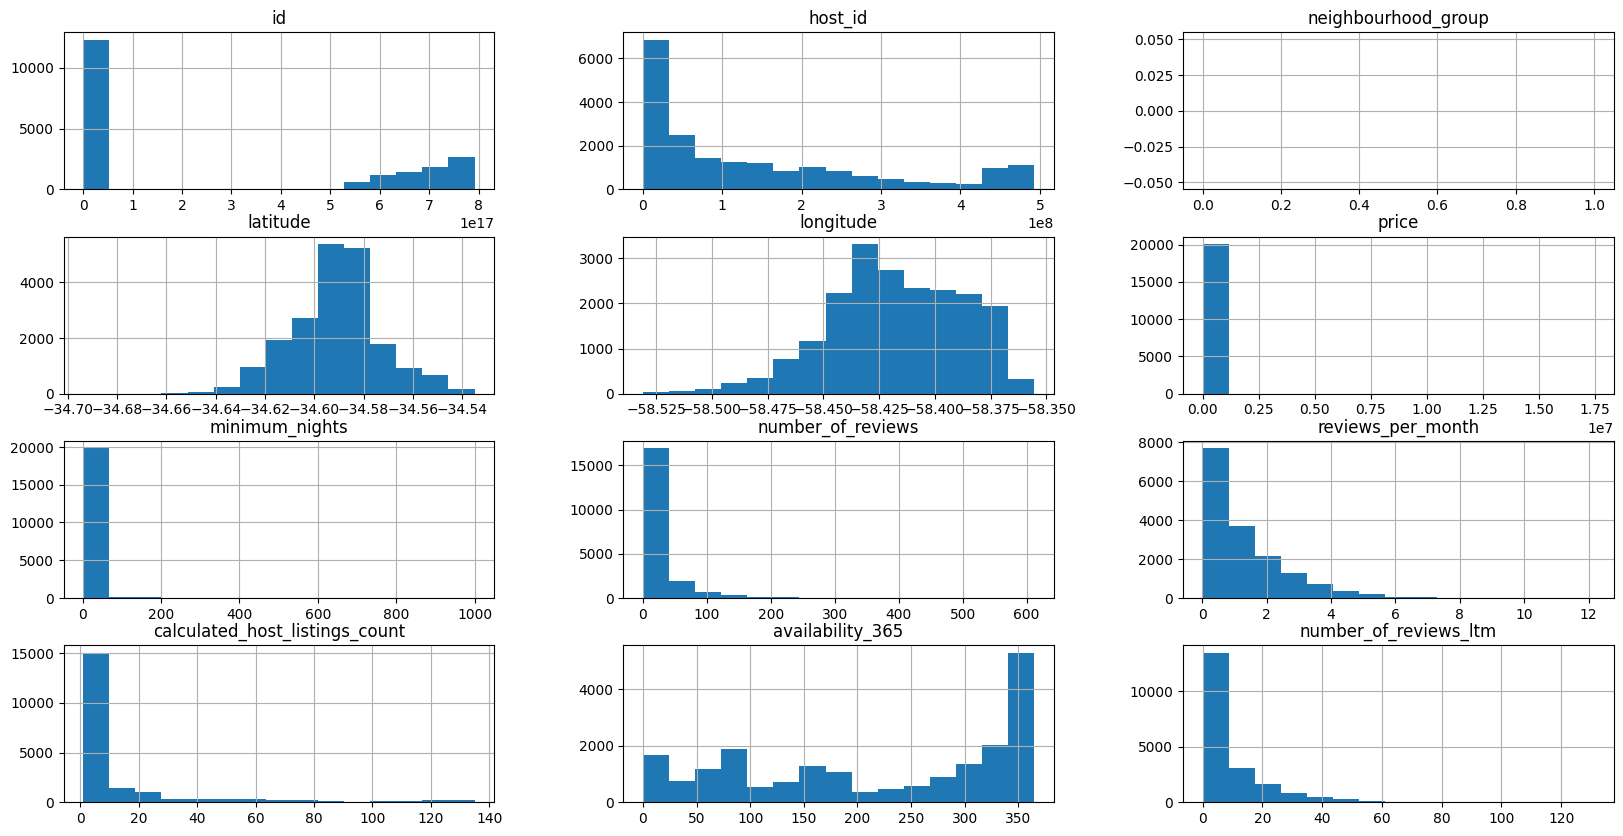

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `minimum_nights`, `number_of_reviews` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
#Estudo - 75% dos valores estão ABAIXO de X(5.0)
df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,2.008500e+04,20085.000000,20085.000000,20085.000000
mean,1.644369e+04,7.208564,21.916604,13.073189
std,1.915379e+05,28.313061,38.478268,26.460109
min,2.600000e+02,1.000000,0.000000,1.000000
25%,5.638000e+03,2.000000,1.000000,1.000000
50%,7.953000e+03,3.000000,8.000000,2.000000
75%,1.233400e+04,5.000000,25.000000,9.000000
max,1.744311e+07,1000.000000,612.000000,135.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `number_of_reviews` possui 75% do valor abaixo de 25, porém seu valor máximo é 612.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.




#### Boxplot para **`minimum_nights`**

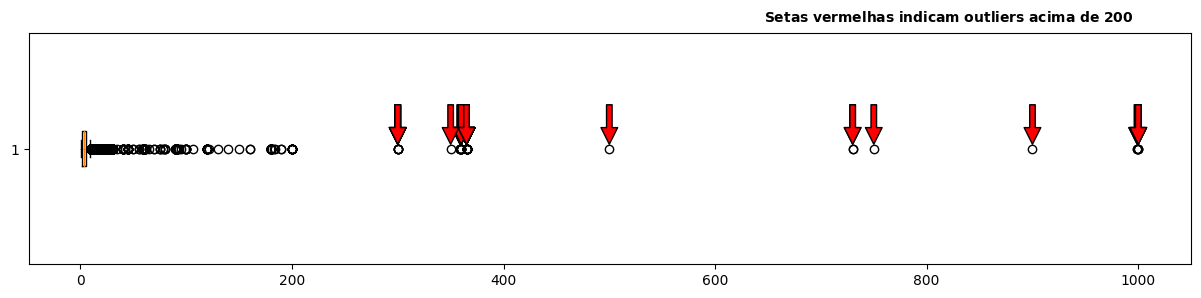

Quantidade de valores maiores que **30**: **371** entradas.

Equivalente a: **1.8471%** dos dados

In [ ]:
#Encontrando os outliers superiores a 200
outliers = df[df.minimum_nights > 200].minimum_nights.tolist()

# Boxplot
fig, ax = plt.subplots(figsize=(15,3))
bp = ax.boxplot(df.minimum_nights, vert=False)

# Adicionando indicadores para os outliers
for outlier in outliers:
    ax.annotate('', xy=(outlier, 1.01), xytext=(outlier, 1.2),
                arrowprops=dict(facecolor='red', shrink=0.05),
                horizontalalignment='center')

#Legenda o gráfico
ax.text(0.95, 1.05, r'$\bf{Setas\ vermelhas\ indicam\ outliers\ acima\ de\ 200}$',
        transform=ax.transAxes, color='black', ha='right')
# Plotando o gráfico
plt.show()


# Quantidade de valores acima de 30 dias para minimum_nights
display(Markdown("Quantidade de valores maiores que **30**: **{:.0f}** entradas.".format(len(df[df.minimum_nights > 30]), 'entradas.')))
# Mostra a porcentagem de dados com minimum_nights acima de 30.
display(Markdown("Equivalente a: **{:.4f}%** dos dados".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100)))

#### Boxplot para **`number_of_reviews`**

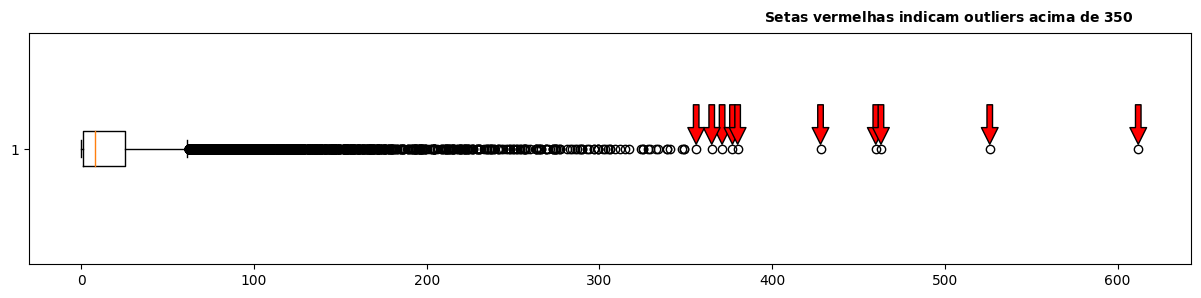

Quantidade de valores maiores que **250**: **85** entradas.

Equivalente a: **0.4232%** dos dados

In [ ]:
# Encontrando os outliers superiores a 350
outliers = df.query('number_of_reviews > 350')['number_of_reviews'].tolist()

# Plotando o boxplot
fig, ax = plt.subplots(figsize=(15,3))
bp = ax.boxplot(df.number_of_reviews, vert=False)

# Adicionando indicadores para os outliers
for outlier in outliers:
    ax.annotate('', xy=(outlier, 1.01), xytext=(outlier, 1.2),
                arrowprops=dict(facecolor='red', shrink=0.05),
                horizontalalignment='center')

# Legenda ao gráfico
ax.text(0.95, 1.05, r'$\bf{Setas\ vermelhas\ indicam\ outliers\ acima\ de\ 350}$',
        transform=ax.transAxes, color='black', ha='right')
# Mostrando o plot
plt.show()
# Quantidade de valores acima de 250 dias para number_of_reviews
display(Markdown("Quantidade de valores maiores que **250**: **{:.0f}** entradas.".format(len(df[df.number_of_reviews > 250]), 'entradas.')))
# Mostra a porcentagem de dados com number_of_reviews acima de 250.
display(Markdown("Equivalente a: **{:.4f}%** dos dados".format((len(df[df.number_of_reviews > 250]) / df.shape[0])*100)))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis **`minimum_nights`** e **`number_of_reviews`**, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.


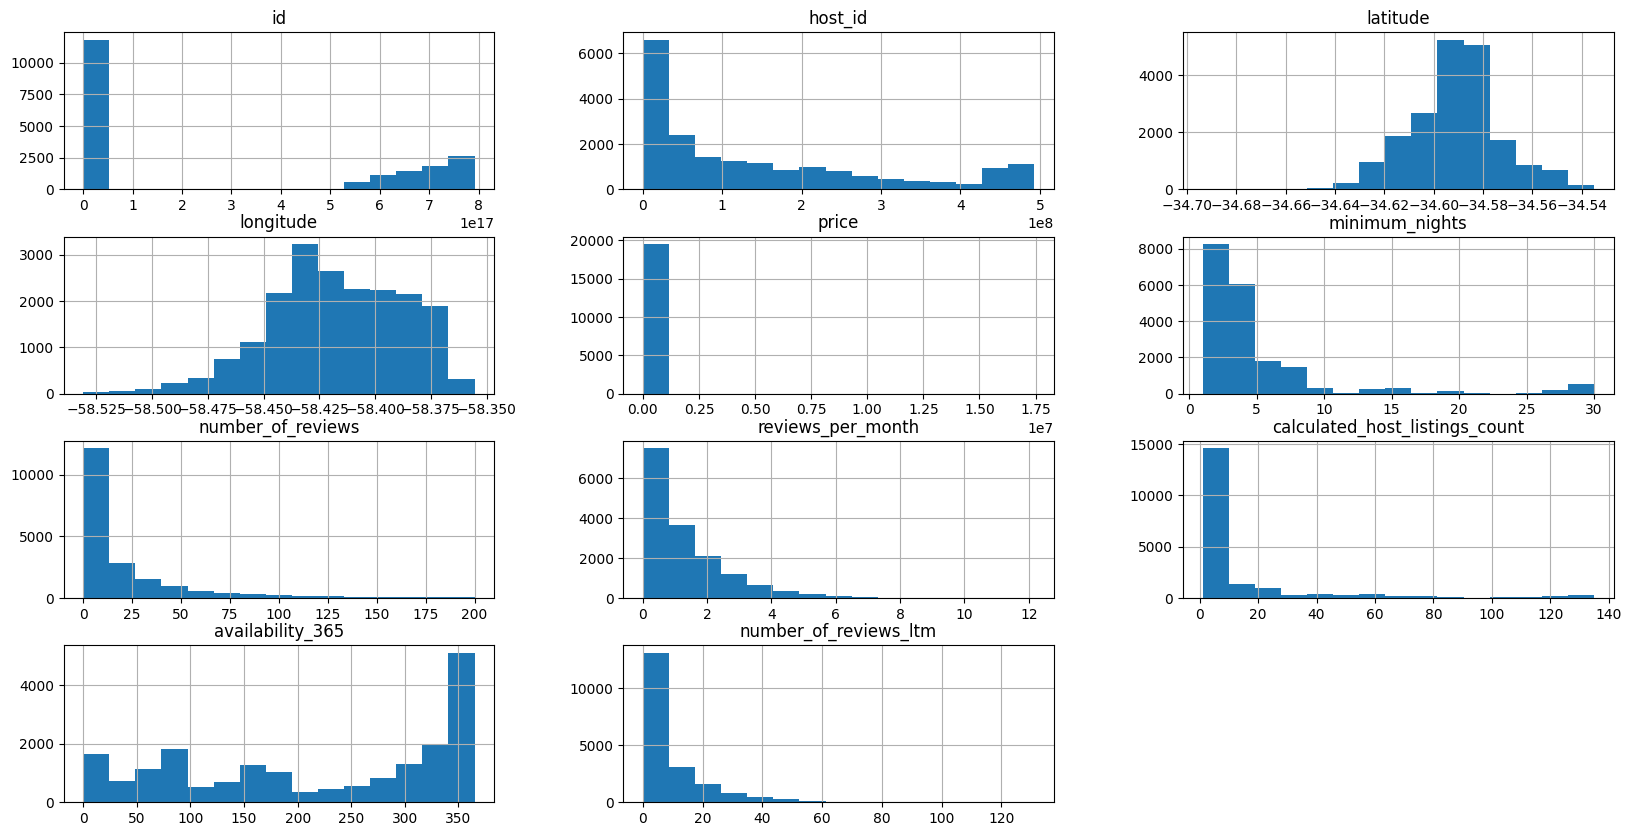

In [ ]:
#Remover os outliers em um novo Dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 200].index, axis = 0, inplace = True)
#Remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#Plotar novo histograma
df_clean.hist(bins=15, figsize=(20,10));

### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# Média da coluna `price``
media_price = df_clean['price'].mean()
print(media_price)

16281.607135544635


[]

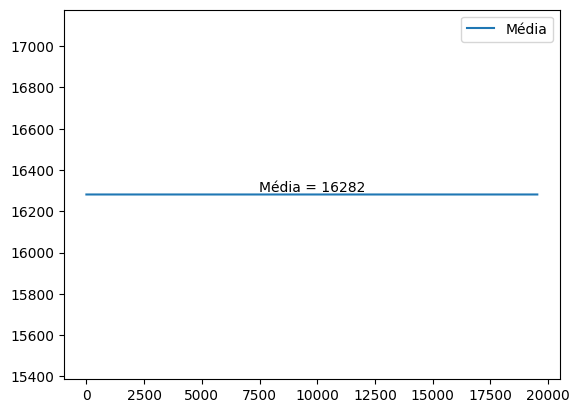

In [ ]:
# Plota uma linha referente a média da variável "price"
plt.plot([media_price]*df_clean.shape[0], label = 'Média')

# Legenda o gráfico
plt.legend()

#Adiciona média no gráfico
plt.text(len(df_clean)/2, media_price, f'Média = {media_price:.0f}', ha='center', va='bottom')

plt.plot()

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.002508,-0.012989,-0.012065,0.008029,0.001354
minimum_nights,-0.002508,1.000000,-0.112071,-0.253379,0.022996,-0.029495
number_of_reviews,-0.012989,-0.112071,1.000000,0.223879,-0.049478,-0.067574
reviews_per_month,-0.012065,-0.253379,0.223879,1.000000,0.081718,0.085486
calculated_host_listings_count,0.008029,0.022996,-0.049478,0.081718,1.000000,0.024304
availability_365,0.001354,-0.029495,-0.067574,0.085486,0.024304,1.000000


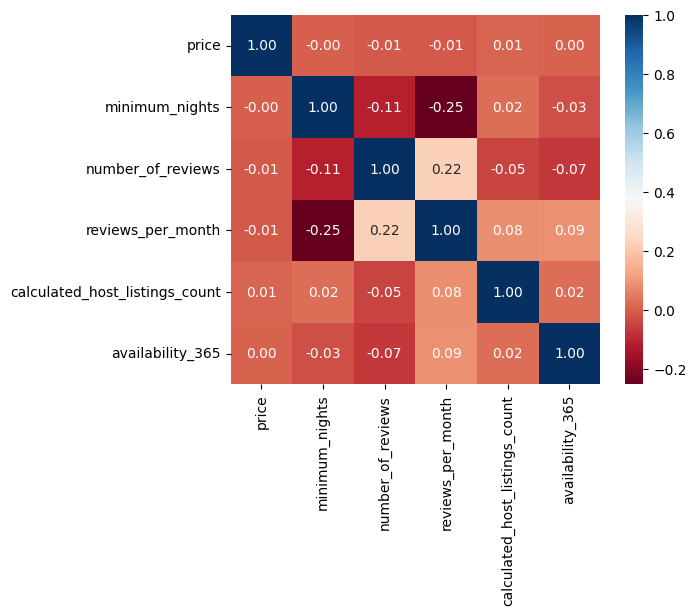

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17341
Private room        1934
Shared room          156
Hotel room           105
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.887643
Private room       0.098997
Shared room        0.007985
Hotel room         0.005375
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Coghlan          283059.373134
Barracas          23066.248227
Puerto Madero     23053.391304
Monte Castro      20410.000000
Almagro           20008.398836
Boca              19648.305556
Retiro            19633.789308
Monserrat         19556.124498
Palermo           18576.408495
San Cristobal     16683.970588
Name: price, dtype: float64

Acima, vemos que bairros como Coghlan e Monte Castro  estão com média de preço superior a de lugares como Palermo e Monserrat.

Uma pessoa que não conhecesse Buenos Aires(como eu não conheço) poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Monte Castro.

Repare que em Monte Castro temos apenas **5** entradas.

Enquanto que em Monserrat temos **747** e em Palermo(Maior bairro de Buenos Aires) temos **6639** entradas.

In [ ]:
# ver quantidade de imóveis no Monte Castro
print("Monte Castro:",df_clean[df_clean.neighbourhood == "Monte Castro"].shape)

# Quantidade em Palermo e Monserrat
print("Monserrat:",df_clean[df_clean.neighbourhood == "Monserrat"].shape)
print("Palermo:",df_clean[df_clean.neighbourhood == "Palermo"].shape)

# ver as 5 entradas do Monte Castro
df_clean[df_clean.neighbourhood == "Monte Castro"]

Monte Castro: (5, 17)
Monserrat: (747, 17)
Palermo: (6639, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
441,990271,Green and fresh peace,5452048,Ana,Monte Castro,-34.620530,-58.51144,Private room,2291,4,0,NaN,NaN,1,365,0,NaN
6930,34325688,"PH a estrenar, monoambiente divisible con patio.",237483550,David,Monte Castro,-34.618165,-58.49531,Entire home/apt,2500,30,0,NaN,NaN,1,365,0,NaN
12515,551555742318350064,Hermoso monoambiente equipado con balcon y ter...,442842588,Gaston,Monte Castro,-34.619950,-58.50422,Entire home/apt,5500,5,3,2022-11-11,0.9,1,76,3,NaN
13478,607409764949880065,Departamento en Montecastro / Versalles,454762059,Facundo,Monte Castro,-34.626220,-58.51681,Entire home/apt,4891,29,0,NaN,NaN,1,363,0,NaN
16405,712240636516222219,4 bedroom house in Buenos Aires,309733529,Diego,Monte Castro,-34.616180,-58.50767,Entire home/apt,86868,4,0,NaN,NaN,1,364,0,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

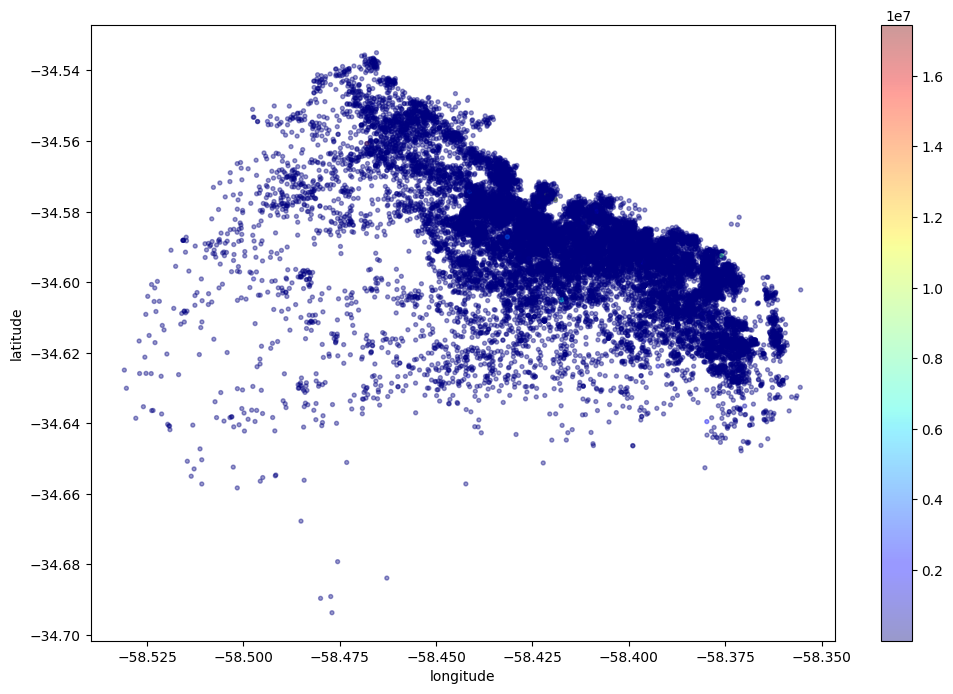

In [ ]:
# plotar os imóveis pela latitude-longitude(colunas)
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Analisando na base de dados do Airbnb, podemos perceber que existem *outliers* em algumas das variáveis. Após realizado a limpeza desses dados, prosseguimos com a análise.

Identificamos a média de **16282** de aluguéis na cidade, equivalendo a **356 Reais**. Portando, pode-se dizer que, Brasileiros interessados em conhecer a cidade, teriam uma hospedagem bem acessível financeiramente.

Também foi identificado os **tipos** e **localidades** de imovéis mais caros, dando uma visão melhor para os turistas.

Notou-se que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, vale ressaltar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial.